In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf 
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))

In [3]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [4]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_norm, datay_onehot, test_size = 0.3, random_state = 111)

In [6]:
print(trnx.shape)
print(trny.shape)

(42000, 28, 28)
(42000, 10)


In [7]:
input_shape = (28, 28, 1)

cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16, (2,2), padding = 'same', input_shape = input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(32, (2,2), padding = 'same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 128, activation = 'relu'))
cnn_model.add(layers.Dense(units = 10, activation = 'softmax'))

cnn_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       1

2022-05-11 13:57:14.132405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 13:57:14.157488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 13:57:14.157582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 13:57:14.158092: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
trnx_reshape = trnx.reshape(-1,28,28,1)
tstx_reshape = tstx.reshape(-1,28,28,1)
trnx_reshape.shape

(42000, 28, 28, 1)

In [9]:
history = cnn_model.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size = 10, epochs = 10)

Epoch 1/10


2022-05-11 13:57:15.455761: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400


   1/4200 [..............................] - ETA: 1:55:51 - loss: 3.7278 - accuracy: 0.2000

2022-05-11 13:57:16.173781: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


4200/4200 [==============================] - 24s 5ms/step - loss: 0.1644 - accuracy: 0.9491 - val_loss: 0.0768 - val_accuracy: 0.9763
Epoch 2/10
4200/4200 [==============================] - 21s 5ms/step - loss: 0.0691 - accuracy: 0.9784 - val_loss: 0.0570 - val_accuracy: 0.9823
Epoch 3/10
4200/4200 [==============================] - 23s 5ms/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.0467 - val_accuracy: 0.9859
Epoch 4/10
4200/4200 [==============================] - 17s 4ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0479 - val_accuracy: 0.9859
Epoch 5/10
4200/4200 [==============================] - 20s 5ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0469 - val_accuracy: 0.9859
Epoch 6/10
4200/4200 [==============================] - 17s 4ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0461 - val_accuracy: 0.9868
Epoch 7/10
4200/4200 [==============================] - 21s 5ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0420 - val_accuracy: 0.9

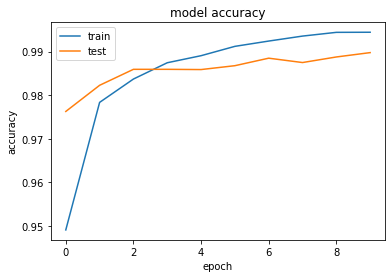

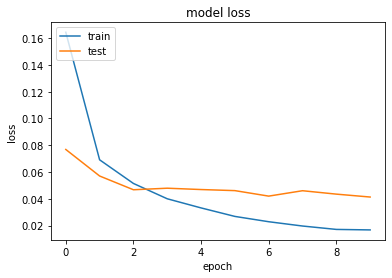

0.9897778034210205
0.9897778034210205


In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))